In [1]:
import pandas as pd
import numpy as np


In [2]:
print(None or True,
      None or False,
      None==None,
      None is None,
      type(None), sep='\n')

True
False
True
True
<class 'NoneType'>


## Numpy

In [3]:
print(np.nan or True,
      np.nan or False,
      np.nan==np.nan,
      np.nan is np.nan,
      type(np.nan), sep='\n')


nan
nan
False
True
<class 'float'>


In [4]:
prueba_faltantes = pd.DataFrame.from_dict(data=dict(x=[0,1,np.nan, np.nan, None],
                                                    y=[0,1,pd.NA, np.nan, None]))
prueba_faltantes

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [5]:
prueba_faltantes.isna()


,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [6]:
pd.Series([pd.to_datetime('2022-01-01'),np.nan]) # Faltante en unidad de tiempo = NaT

0   2022-01-01
1          NaT
dtype: datetime64[ns]

In [7]:
%pip install pyjanitor
%pip install missingno
%pip install pyreadr
%pip install session_info
%pip install UpSetPlot

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import warnings
warnings.filterwarnings('ignore')
import janitor
import matplotlib.pyplot as plt
import missingno as msno
import pyreadr
import session_info
import seaborn as sns
import upsetplot

/opt/conda/lib/python3.11/site-packages/upsetplot/plotting.py:15: MatplotlibDeprecationWarning: The matplotlib.tight_layout module was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  from matplotlib.tight_layout import get_renderer


In [9]:
%run ./explore_tools/pandas-missing-extension.ipynb

In [10]:
resultado=pyreadr.read_r('./explore_tools/riskfactors.rda')
datos_riesgo=resultado['riskfactors']
datos_riesgo.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


In [11]:
datos_riesgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

In [12]:
datos_riesgo.shape

(245, 34)

In [13]:
datos_riesgo.isna().sum()/datos_riesgo.shape[0]

state               0.000000
sex                 0.000000
age                 0.000000
weight_lbs          0.040816
height_inch         0.008163
bmi                 0.044898
marital             0.004082
pregnant            0.877551
children            0.000000
education           0.004082
employment          0.000000
income              0.000000
veteran             0.012245
hispanic            0.008163
health_general      0.000000
health_physical     0.000000
health_mental       0.000000
health_poor         0.461224
health_cover        0.000000
provide_care        0.012245
activity_limited    0.012245
drink_any           0.008163
drink_days          0.546939
drink_average       0.551020
smoke_100           0.008163
smoke_days          0.522449
smoke_stop          0.865306
smoke_last          0.657143
diet_fruit          0.032653
diet_salad          0.032653
diet_potato         0.032653
diet_carrot         0.032653
diet_vegetable      0.032653
diet_juice          0.032653
dtype: float64

In [14]:
datos_riesgo.missing.number_complete()

7144

In [15]:
datos_riesgo.missing.number_missing()

1186

In [16]:
datos_riesgo.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


In [17]:
#datos_riesgo.missing.missing_variable_table()

In [18]:
# Cantidad de registros con respecto a la cantidad de variables nulas (por filas)
datos_riesgo.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


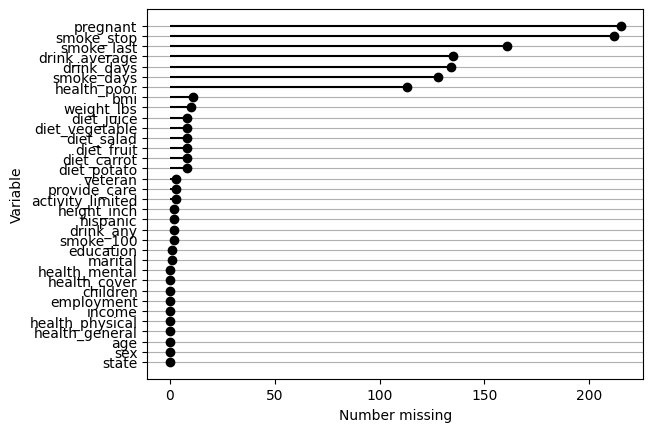

In [19]:
# Visualizacion de datos faltantes
datos_riesgo.missing.missing_variable_plot()

<Axes: >

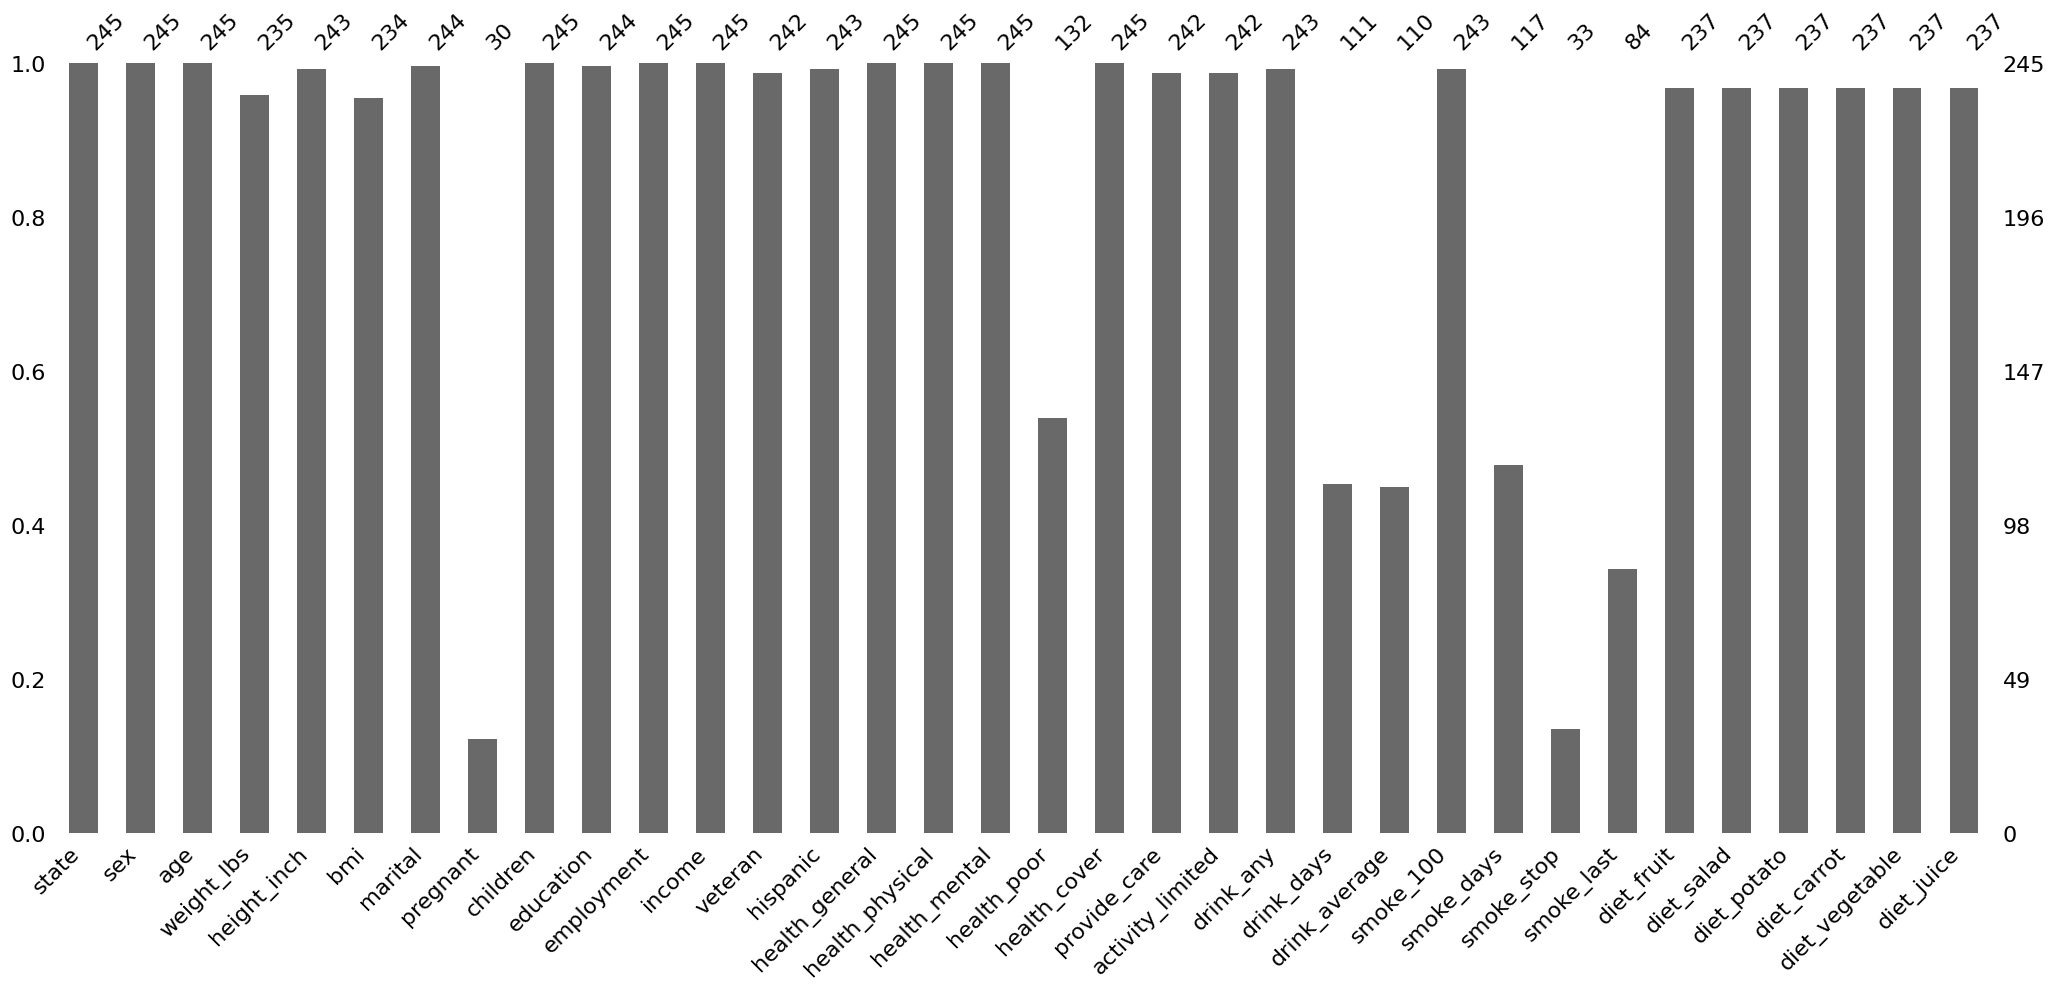

In [20]:
msno.bar(datos_riesgo)

<Axes: >

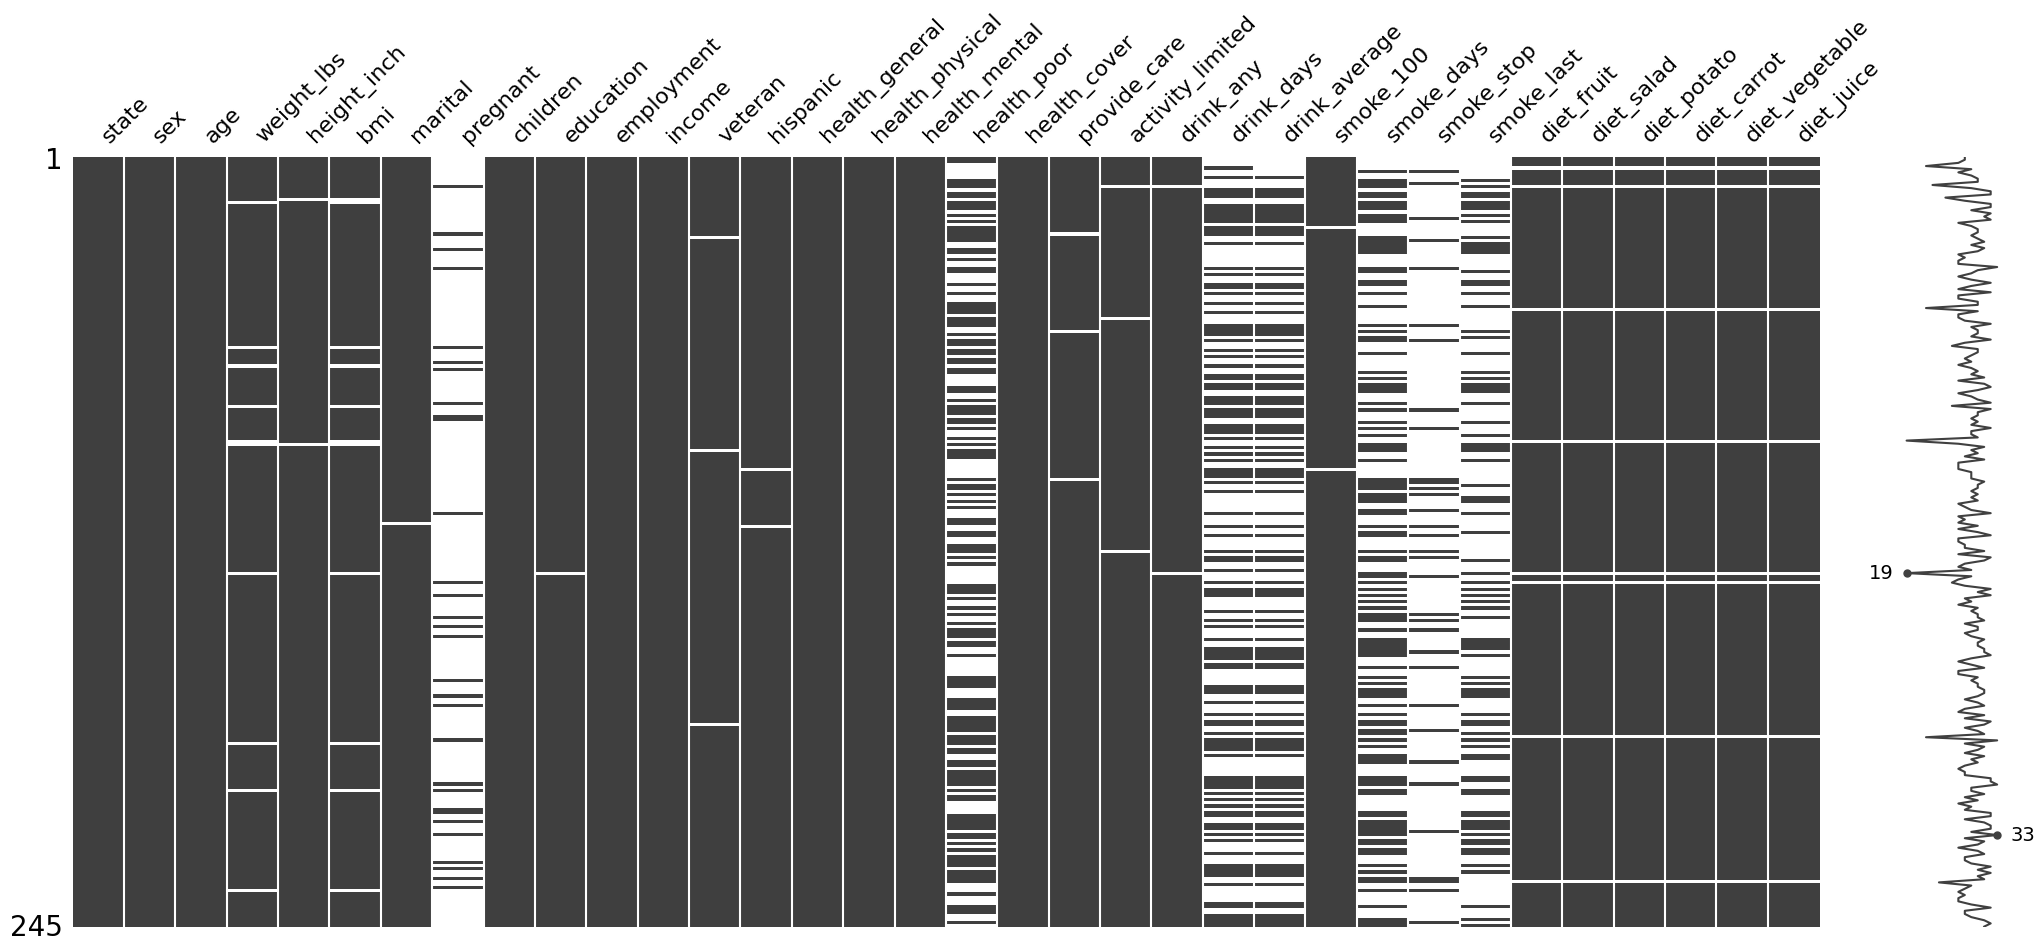

In [21]:
msno.matrix(datos_riesgo)

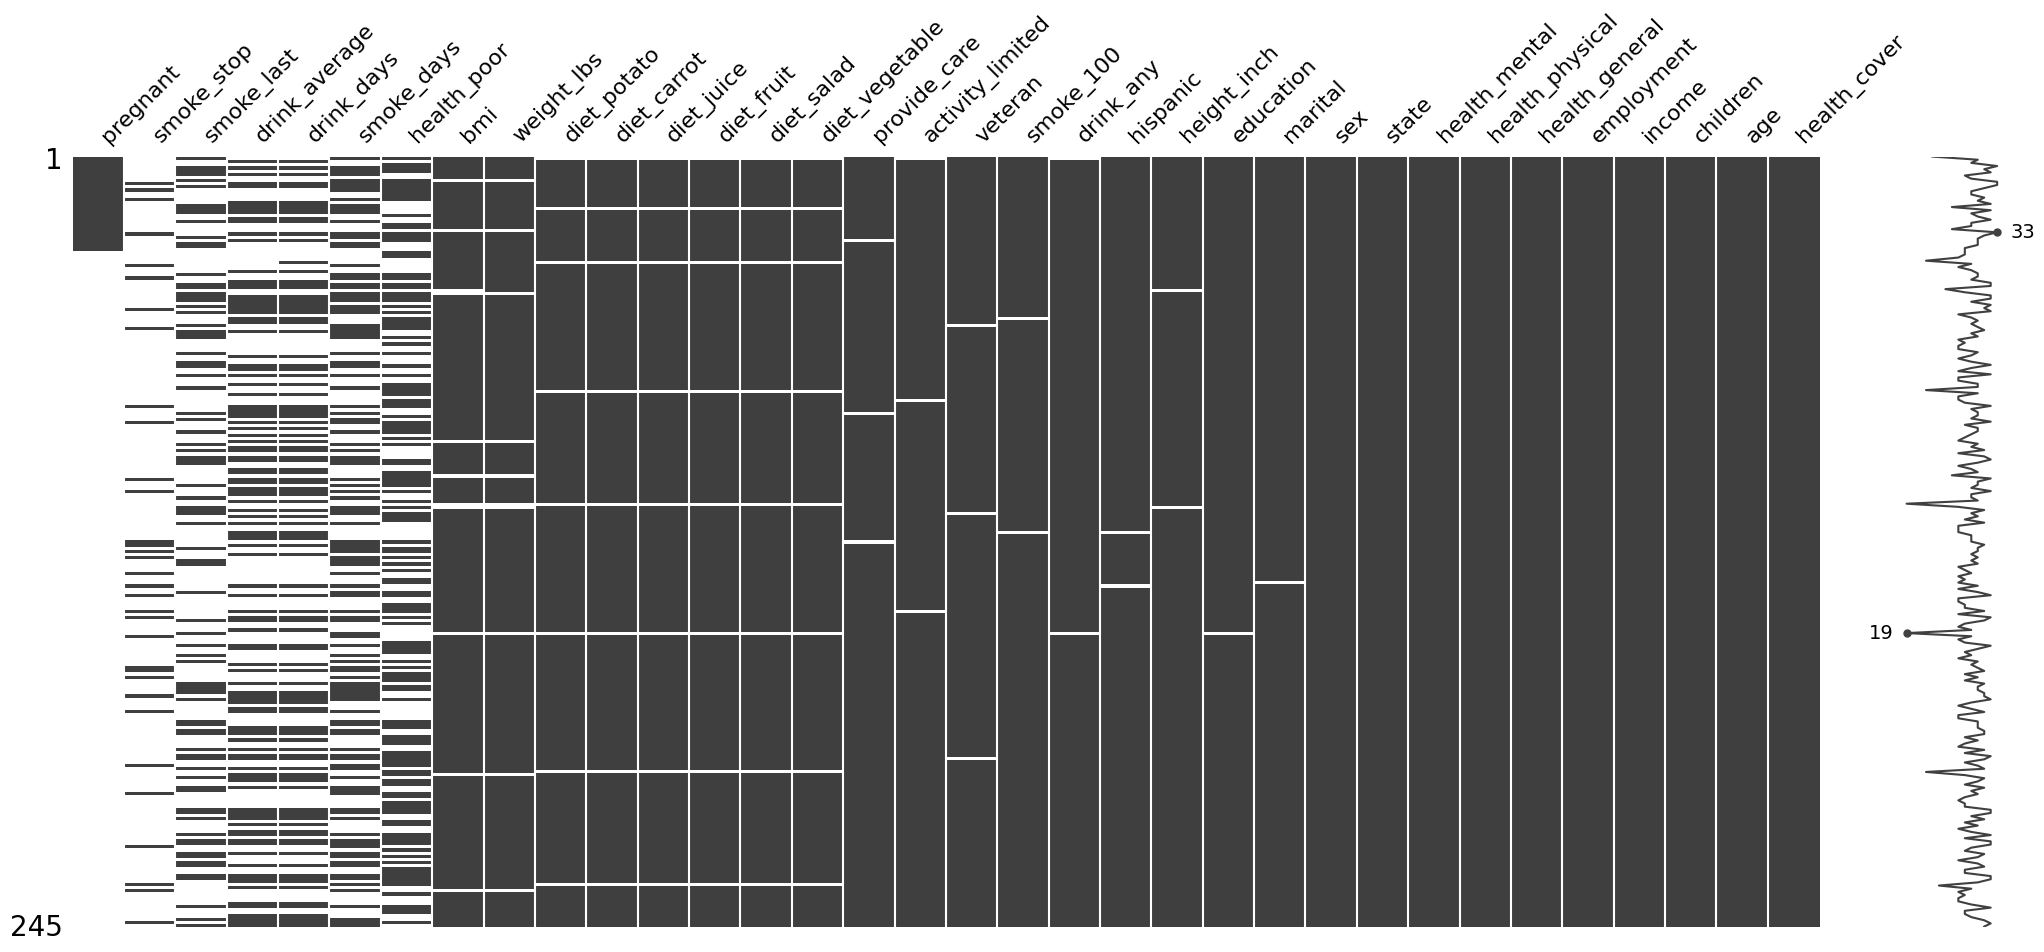

In [22]:
datos_riesgo.missing.sort_variables_by_missingness().sort_values(by='pregnant').pipe(msno.matrix)
plt.show()

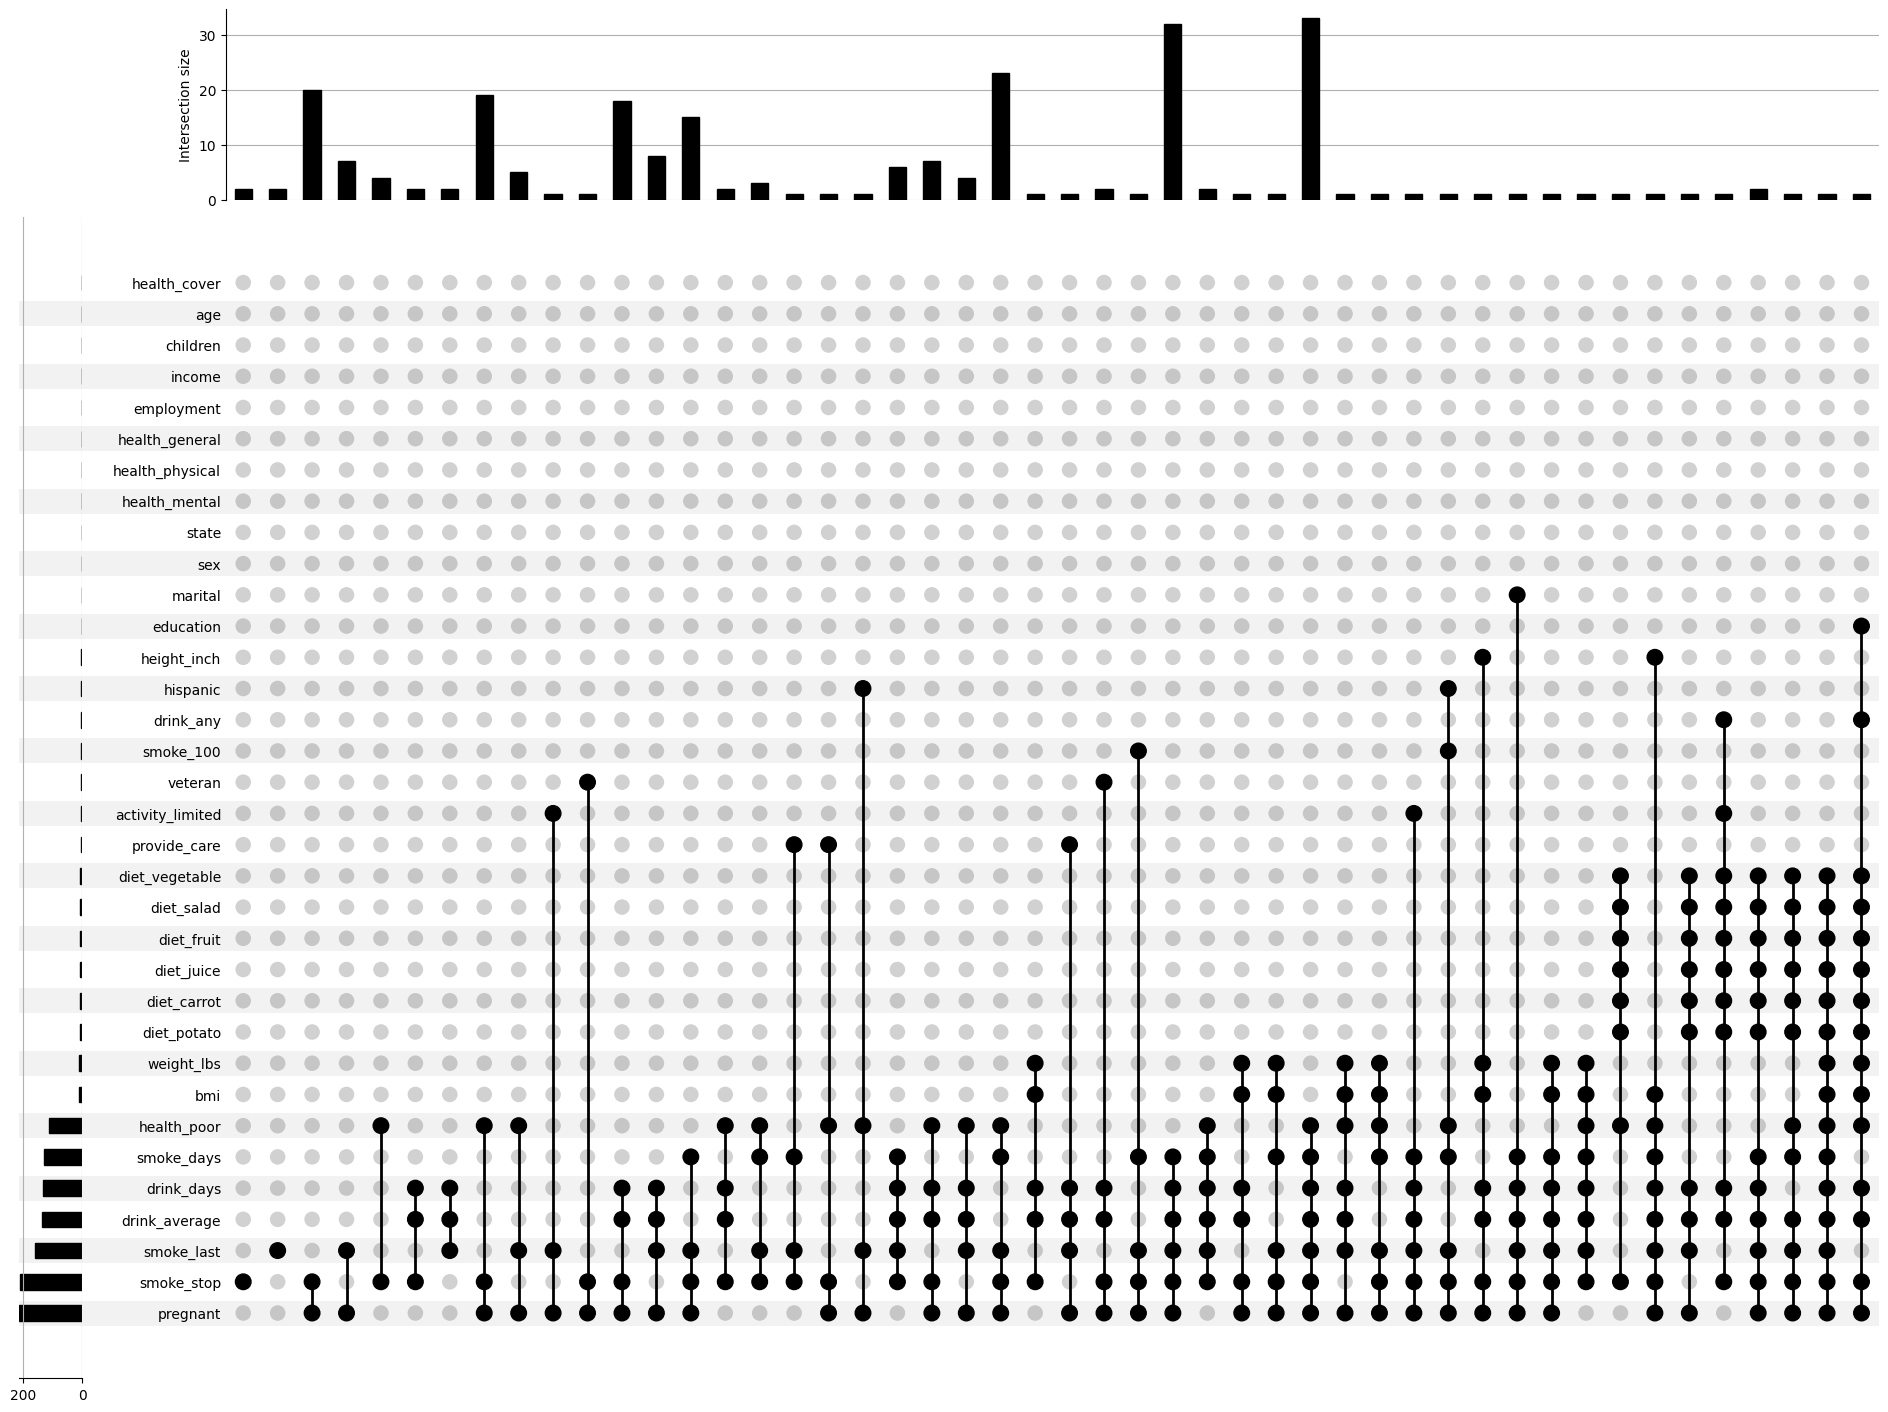

In [23]:
datos_riesgo.missing.missing_upsetplot(variables=None)
plt.show()
# La frecuencia de nulos en las variables representadas
#De la menos nula a la mas nula
# Cada columna es un intervalo de frecuencia ()
# en la tercera todo individuo que tiene pregnant nula, tambien tiene smoke stop nula

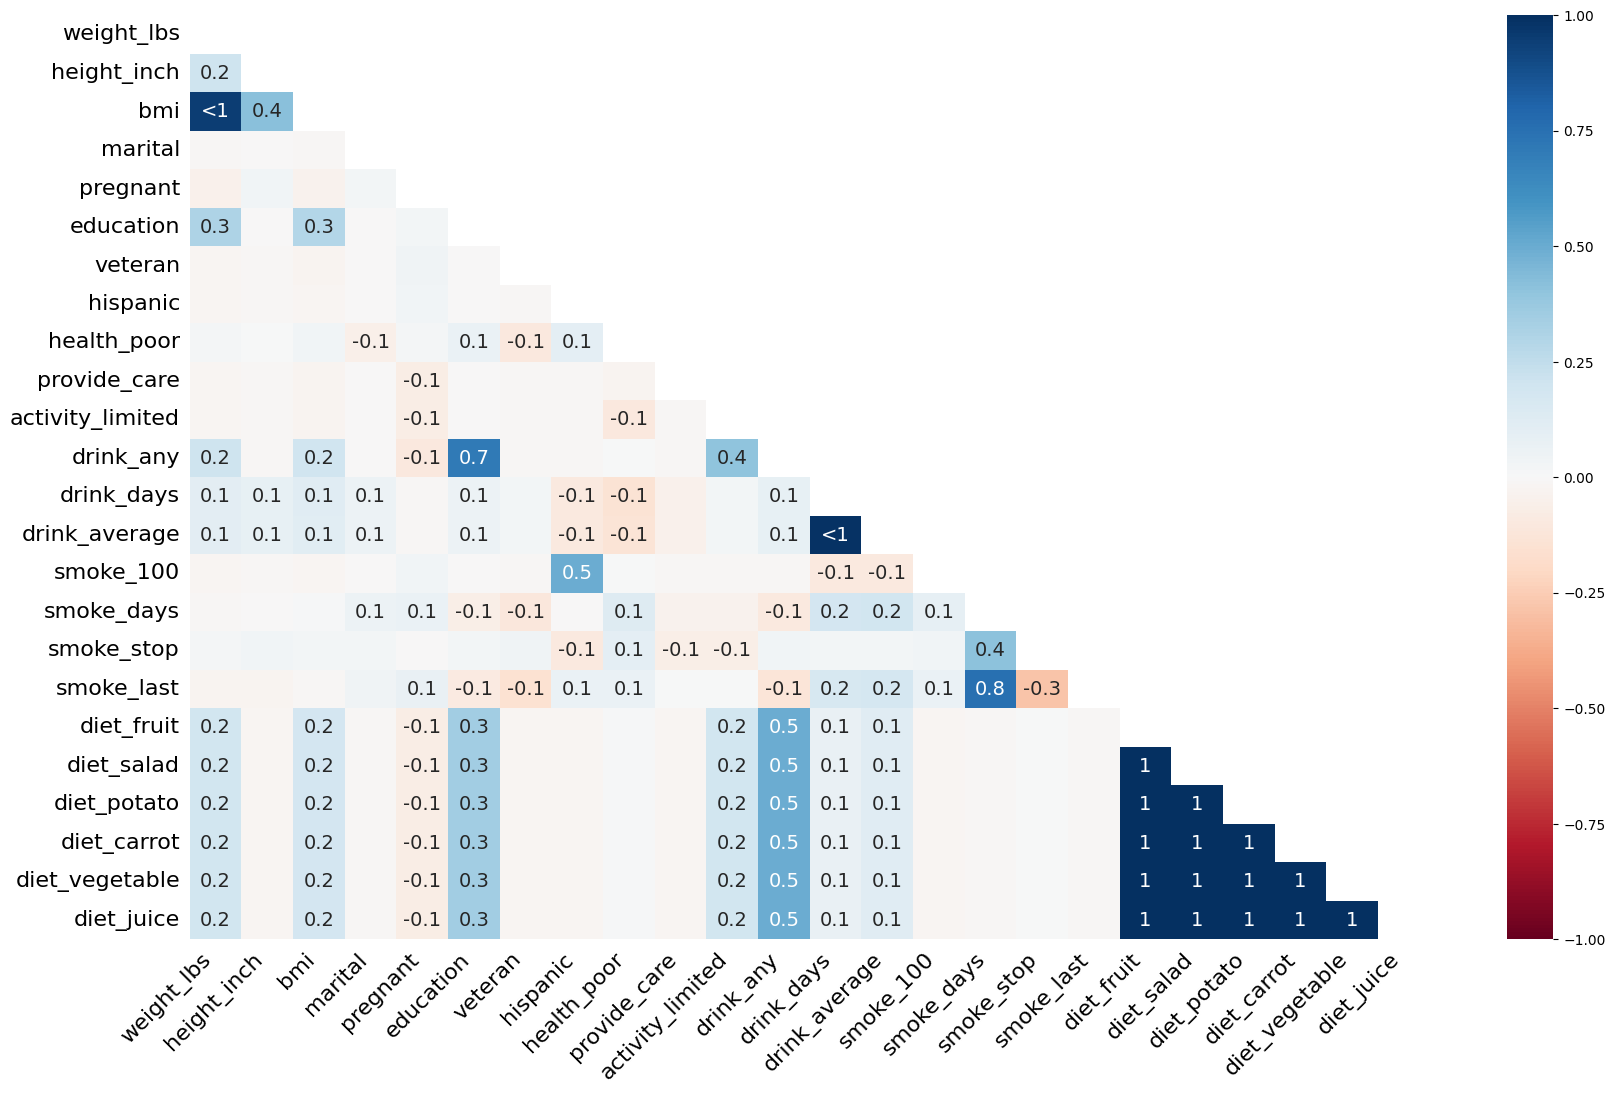

In [24]:
msno.heatmap(datos_riesgo)
plt.show()

MAR (mISSING AT RANDOM)

In [25]:
import seaborn as sb


In [26]:
names=["pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "diabetes_pedigree_function", "age", "outcome"]
datos = pd.read_csv("./explore_tools/pima-indians-diabetes.csv", header=None, names=names)
datos.head()
 

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

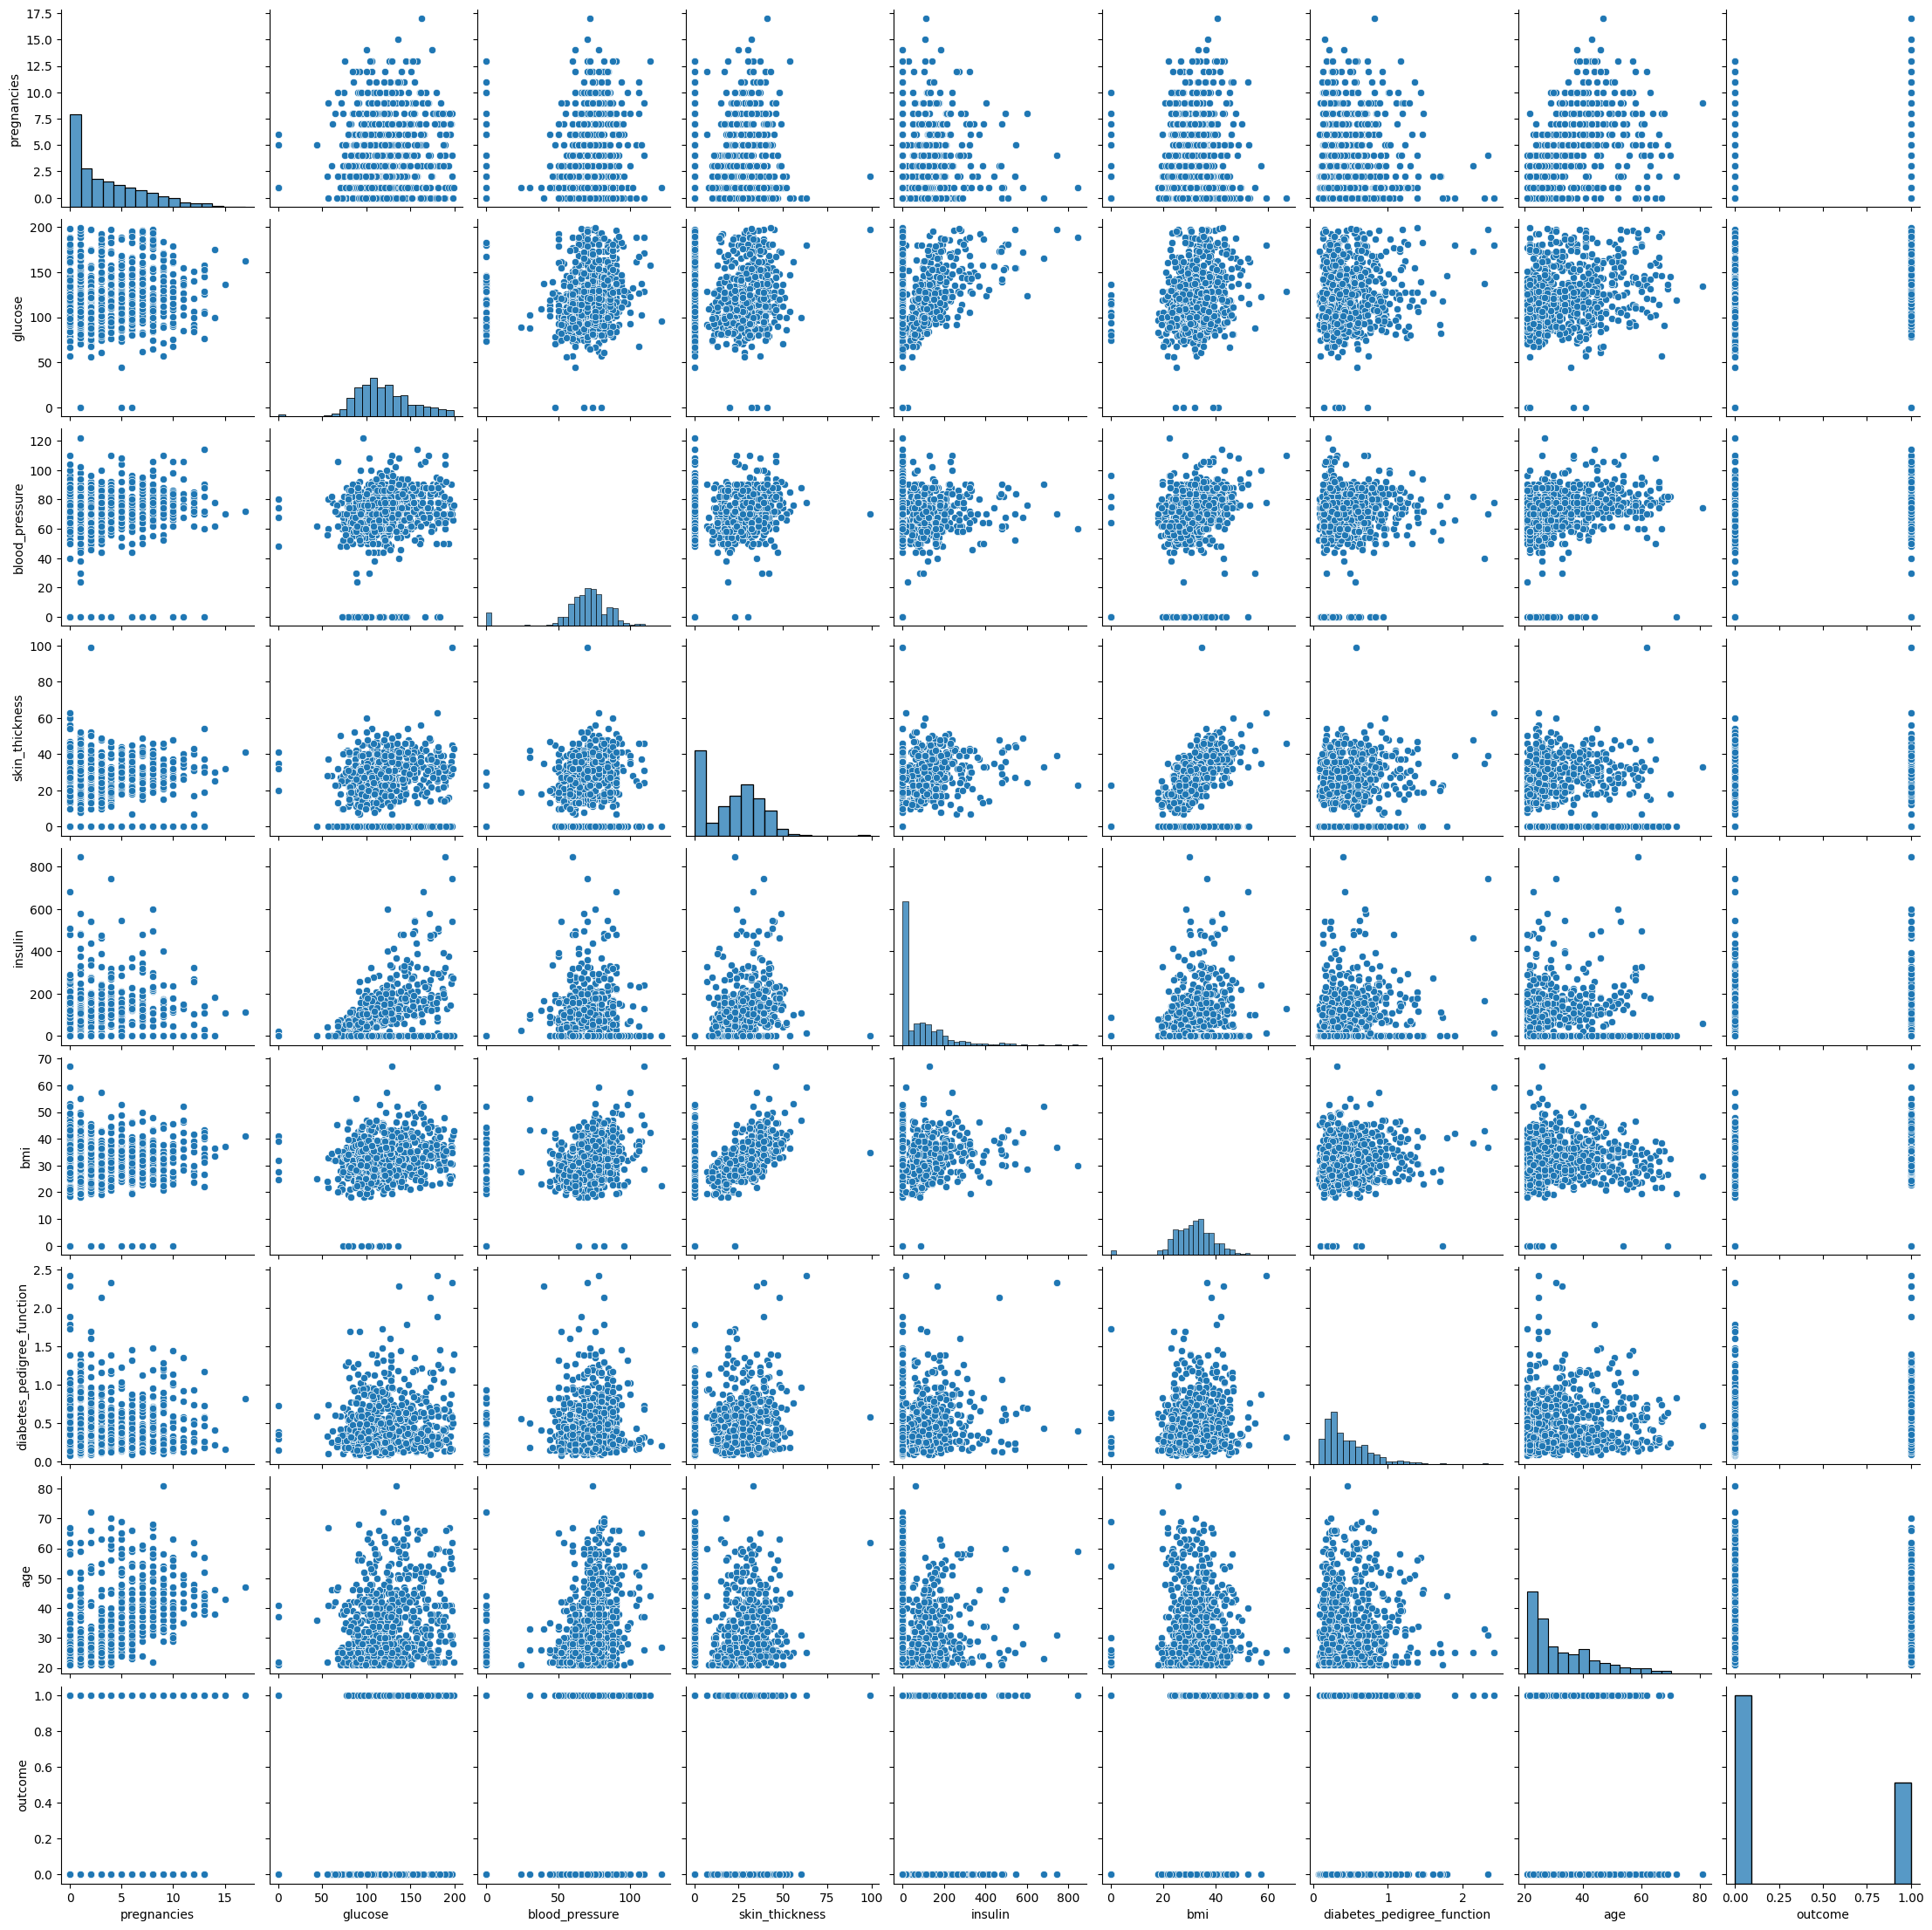

In [27]:
sb.pairplot(data=datos,kind='scatter')

In [28]:
datos.corr()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


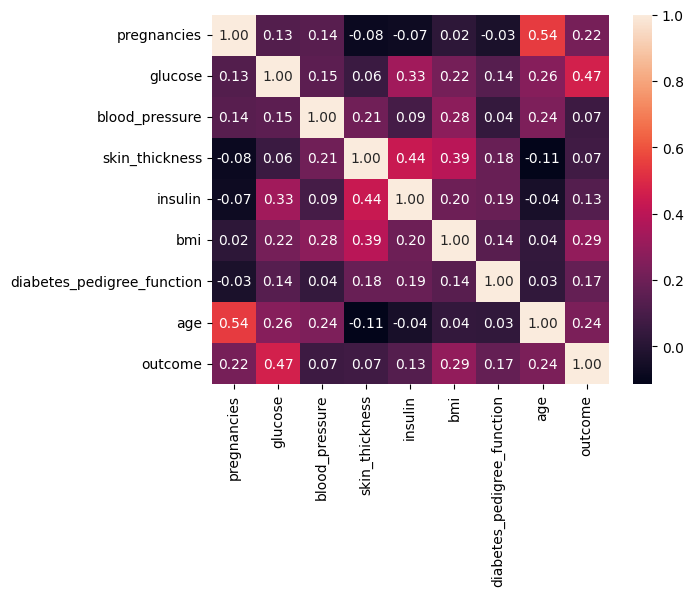

In [30]:
import seaborn as sb
sb.heatmap(data = datos.corr(), annot=True, fmt= '.2f')
plt.show()

In [33]:
# Insulin - glucose MAR
# Skin thickness - bmi MAR
# Blood pressure MNAR
# bmi - skin_thickness MNAR
# glucose - insulin MNAR

<Axes: >

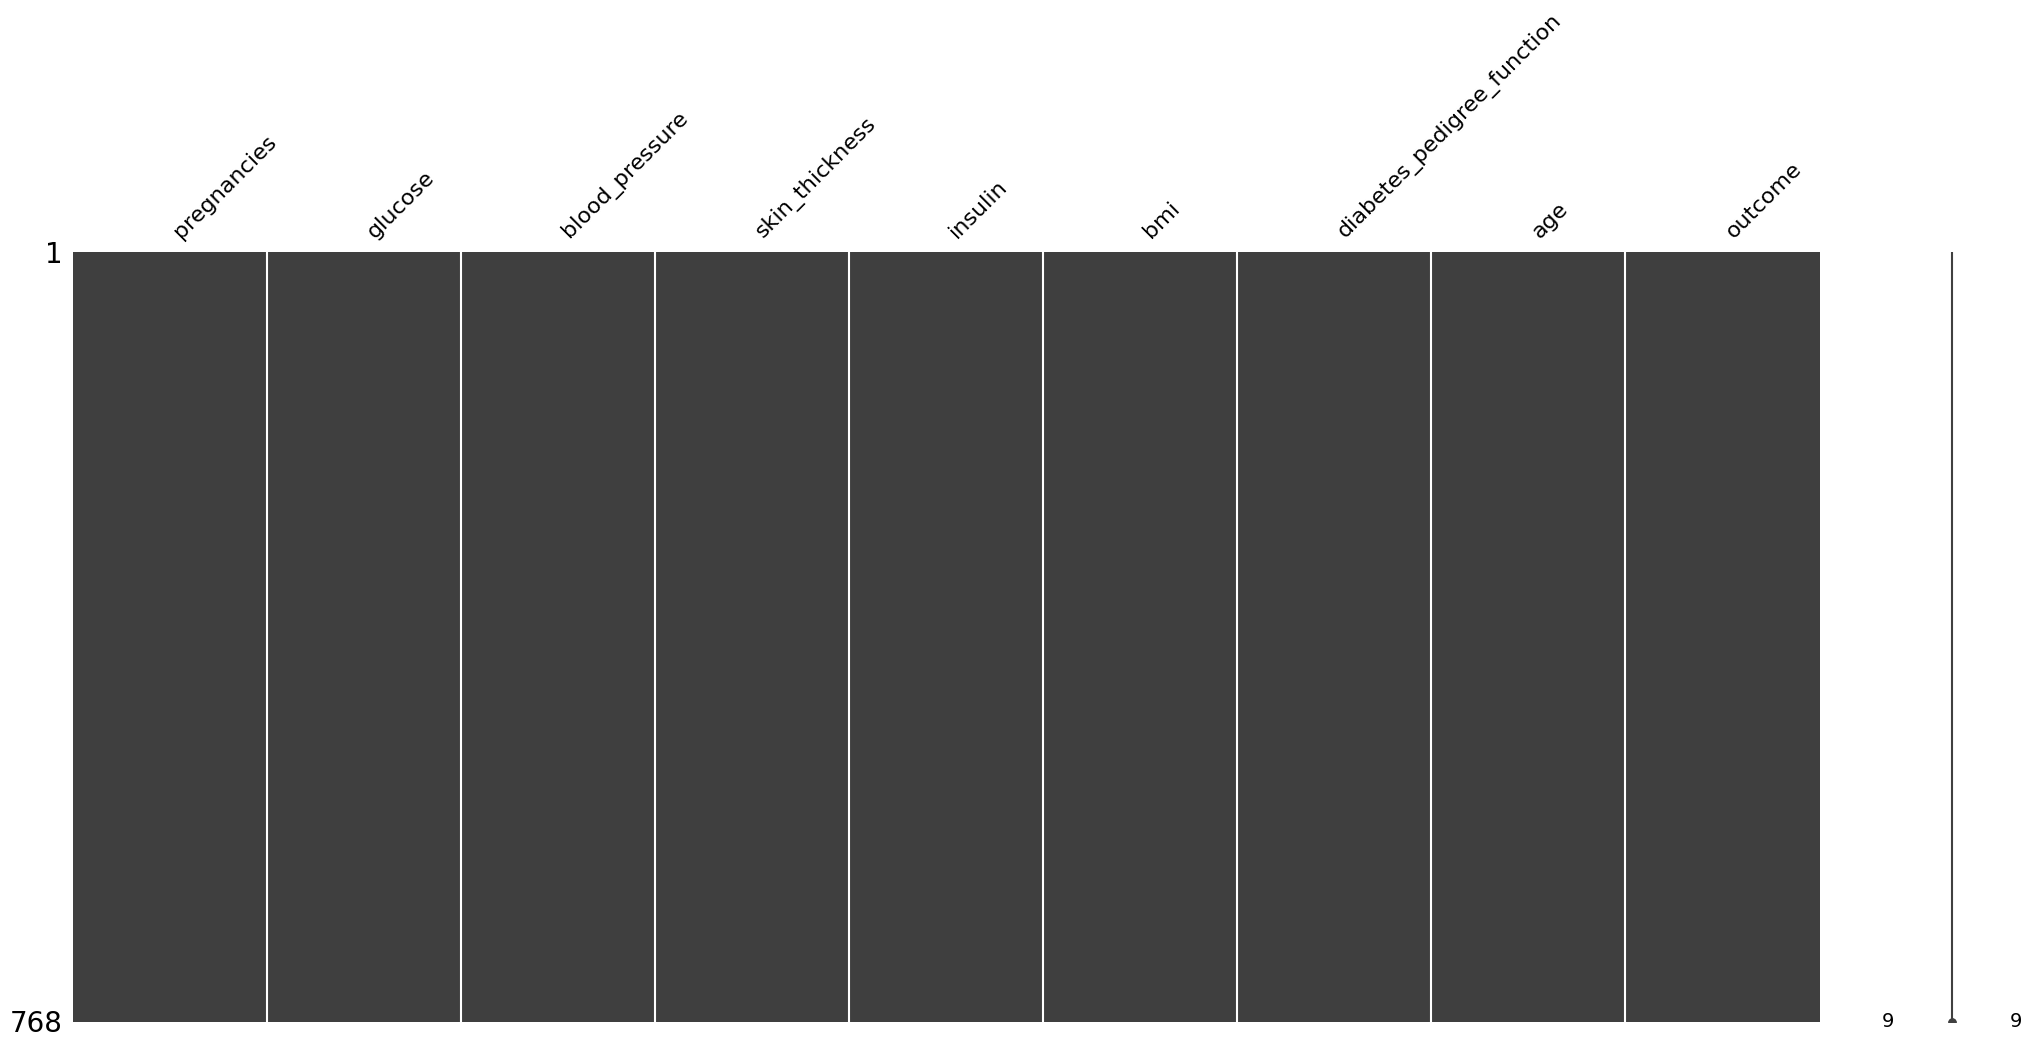

In [36]:
datos.missing.sort_variables_by_missingness().sort_values(by='insulin').pipe(msno.matrix) 